In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#from mlxtend.regressor import StackingRegressor

import joblib

In [6]:
df=pd.read_csv('baseball.csv')
pd.set_option('display.max_columns',None)

In [7]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
df.shape

(30, 17)

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# checking for missing values in dataset

In [10]:
df.isnull().sum()#there are no missing values in  the dataset

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Checking correlation between attributes

In [11]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [12]:
#we can see RA and ER are highly negatively correlated to the target variable 'W'.
#I have tried a model without dropping any column also.
#dropping these columns is giving a better score.

# Dropping highly negatively correlated attributes

In [13]:
df=df.drop(['RA','ER'],axis=1)

# EDA

# Univariate analysis

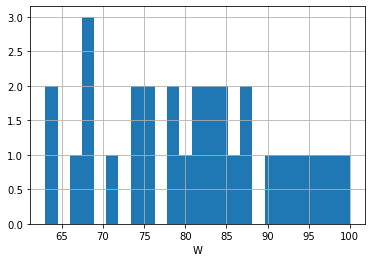

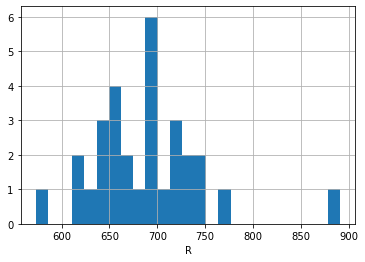

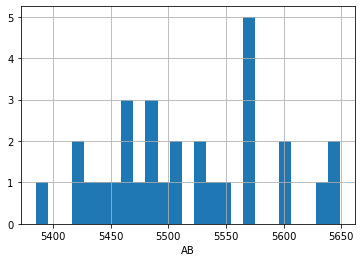

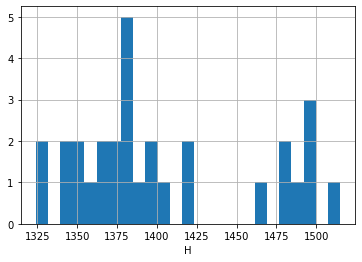

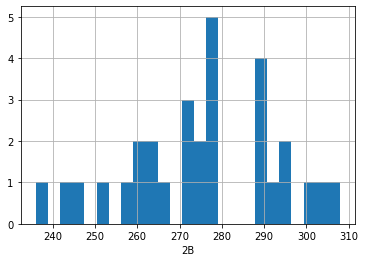

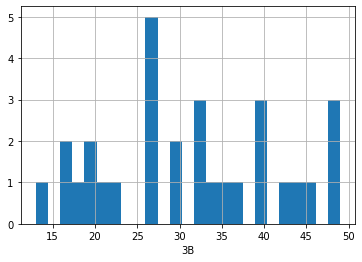

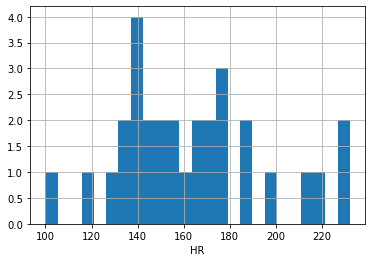

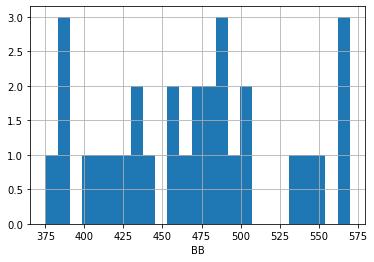

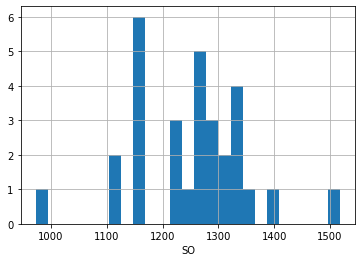

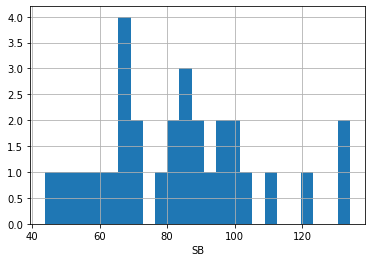

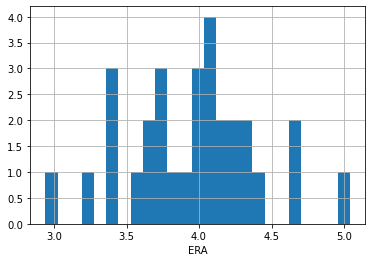

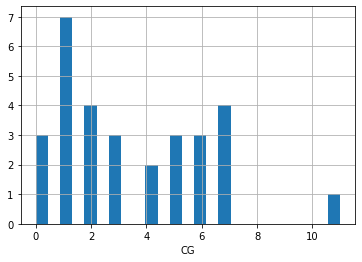

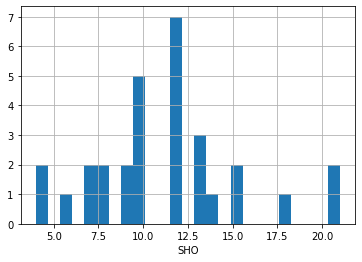

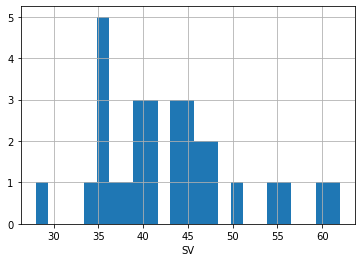

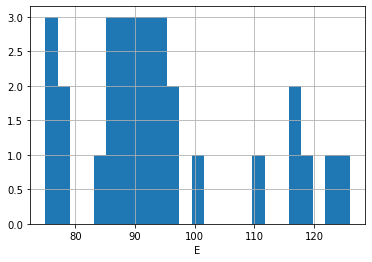

In [14]:
#checking skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

In [15]:
#We can see data is skewed,we need to change it to gaussian distribution before model building.
#Drawing isight from the data is difficult as no proper domain knowledge is available.

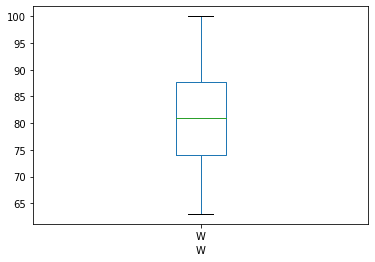

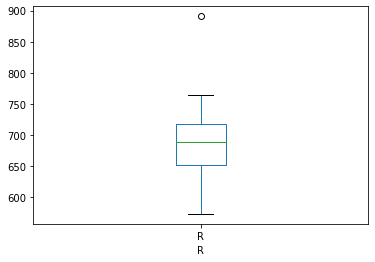

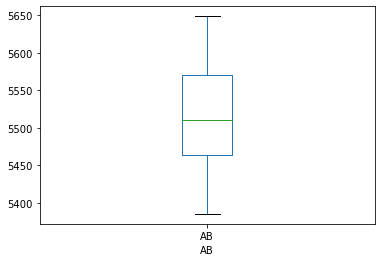

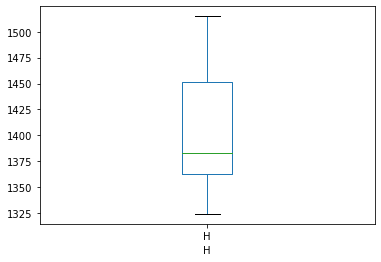

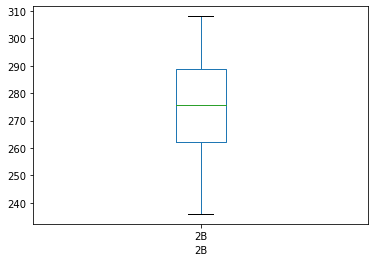

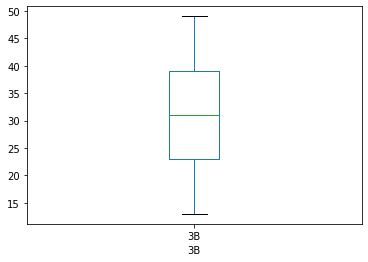

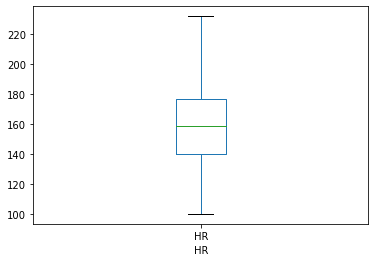

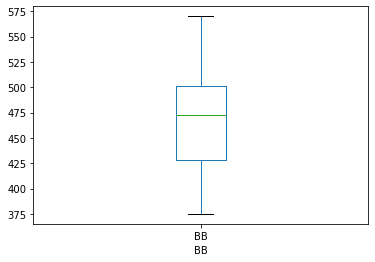

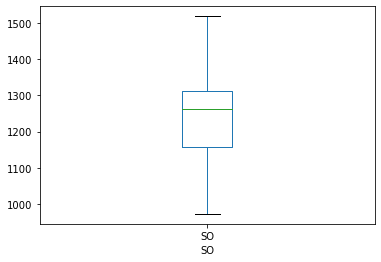

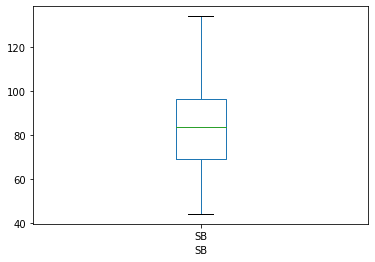

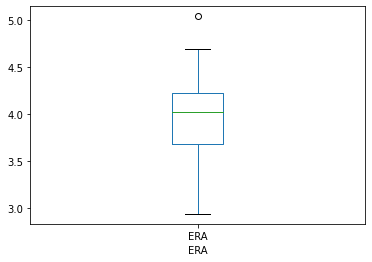

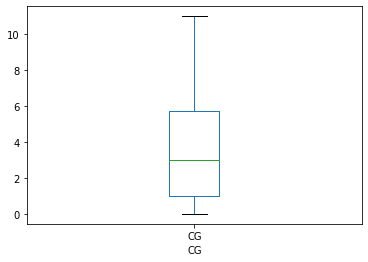

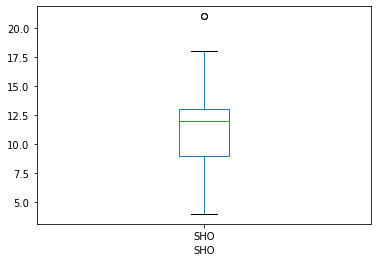

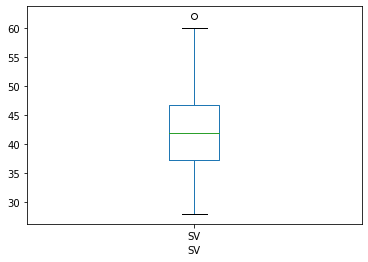

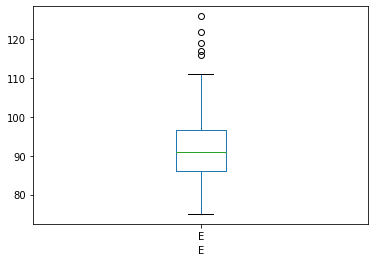

In [16]:
#checking outliers
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

# Feature Engineering

In [17]:
#data is skewed
#so we will use two step method to remove skewness as much as possible.
#1-->log transformations
#2-->StandarScaler

In [18]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# Outlier removal

In [19]:
#Removing outliers first
from scipy.stats import zscore
z=abs(zscore(df))
z.shape

(30, 15)

In [20]:
df=df[(z<3).all(axis=1)]
df.shape

(29, 15)

# Separating training and testing set

In [21]:
#Separating the training and testing set
y=df[['W']]
X=df.drop(['W'],axis=1)

In [22]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

# Skewness removal by log transformation technique

In [23]:
#removing skewness second
for col in X.columns:
    if X.skew().loc[col]>0.55:
        X[col]=np.log1p(X[col])
    

# Scaling the data

In [24]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)


In [25]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.511388,-0.240415,-0.813262,1.554812,-0.435733
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.238952,-0.240415,0.159299,0.296229,-0.598110
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.643801,1.815711,-0.326982,-0.672787,-1.197382
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.040333,1.214333,-0.570122,-0.825263,0.538291
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.496876,1.214333,0.159299,-1.142637,-0.598110


In [26]:
x.skew()

R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

# Model building

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [28]:
knn=KNeighborsRegressor()
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
gbm=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfr=RandomForestRegressor()
xgb=XGBRegressor()

In [29]:
models=[]
models.append(('KNeighborsRegressor',knn))
models.append(('SVR',svr))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('GradientBoostingRegressor',gbm))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rfr))
models.append(('XGBRegressor',xgb))

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [31]:
Model=[]
r2score=[]
rmse=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    score=r2_score(y_test,pre)
    print('R2score  -',score)
    r2score.append(score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=3,scoring='r2').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    rmsescore=np.sqrt(mean_squared_error(y_test,pre))
    print('rmse_score  -',rmsescore)
    rmse.append(rmsescore)
    print('\n')
    
    
    
    
   
    

***************** KNeighborsRegressor *******************


KNeighborsRegressor()


R2score  - 0.4398635588402502


cross_val_score  - 0.11278649762249571


rmse_score  - 7.84729252672538


***************** SVR *******************


SVR()


R2score  - 0.05179626153431616


cross_val_score  - -0.208718111870248


rmse_score  - 10.209953403300679


***************** LinearRegression *******************


LinearRegression()


R2score  - 0.8632743368674167


cross_val_score  - 0.33328089830190993


rmse_score  - 3.8770191630476076


***************** DecisionTreeRegressor *******************


DecisionTreeRegressor()


R2score  - 0.1699829448550313


cross_val_score  - -1.3303280742173982


rmse_score  - 9.5524865872714


***************** GradientBoostingRegressor *******************


GradientBoostingRegressor()


R2score  - 0.40137649357407357


cross_val_score  - -0.5765364227374878


rmse_score  - 8.112408504118878


***************** AdaBoostRegressor *******************


AdaBoostR

In [32]:
result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

,Model,R2_score,RMSEscore,Cross_val_score
0,KNeighborsRegressor,43.986356,7.847293,11.278650
1,SVR,5.179626,10.209953,-20.871811
2,LinearRegression,86.327434,3.877019,33.328090
3,DecisionTreeRegressor,16.998294,9.552487,-133.032807
4,GradientBoostingRegressor,40.137649,8.112409,-57.653642
5,AdaBoostRegressor,-2.719601,10.626729,-18.963685
6,RandomForestRegressor,44.877624,7.784611,-6.665564
7,XGBRegressor,29.706738,8.790828,-2.960440


In [33]:
#We can see LinearRegression is performing the best with R2 score=86.32%
#And also the RMSE score is well within range for this particular problem.

In [34]:
#But our target score is 90%
#Hence we will apply Gridsearchcv to the top3 performing model and try to reach 90% score.

In [35]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them to attain our target score of 90%.

# Finding the best random_state for all models

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.25)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

In [37]:
print('knn',maxr2_score(knn,x,y))
print('SVR',maxr2_score(svr,x,y))
print('lr',maxr2_score(lr,x,y))
print('dt',maxr2_score(dt,x,y))
print('gbm',maxr2_score(gbm,x,y))
print('rfr',maxr2_score(rfr,x,y))
print('xgb',maxr2_score(xgb,x,y))

print('ada',maxr2_score(ada,x,y))

max_r2_score is at random_state   82   which is   0.6606307222787386
knn 82
max_r2_score is at random_state   54   which is   0.155106431788663
SVR 54
max_r2_score is at random_state   47   which is   0.9599134796033035
lr 47
max_r2_score is at random_state   44   which is   0.7317474376818929
dt 44
max_r2_score is at random_state   94   which is   0.804542493250451
gbm 94
max_r2_score is at random_state   70   which is   0.7918347551342809
rfr 70
max_r2_score is at random_state   46   which is   0.7928577520640292
xgb 46
max_r2_score is at random_state   48   which is   0.8356034174017261
ada 48


# GridsearchCV

# model2->XGBoostRegressor(random_state=46)=79.28

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46)
xgb=XGBRegressor()

In [67]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=gscv.fit(x_train,y_train)
grid_search.best_params_

{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5}

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46)
xgb=XGBRegressor(colsample_bytree=0.6, learning_rate=0.1, max_depth=5)
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
print('r2_score=  ',r2_score(y_test,pred))
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score=   0.7686489851407381
RMSE score=  3.6373597790518386


In [92]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
xgb=XGBRegressor(colsample_bytree=0.6, learning_rate=0.1, max_depth=5)
xgb.fit(x,y)
cvs=cross_val_score(xgb,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   -0.5575674760464422


Score not more than LinearRegression model.
cross_val_scores=   0.6402167800974148(score can be considered positive,read cross_val_scores documents)

Shortage of data.scores not good.

# model3->AdaboostRegressor(random_state=70)=80.74

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70)
ada=AdaBoostRegressor()

In [72]:
parameters=[{'base_estimator':[lr,rfr],'n_estimators':[100,250,500],'learning_rate':[0.1,0.001,1]}]
            
grid_search=GridSearchCV(ada,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'base_estimator': RandomForestRegressor(max_depth=5, min_samples_leaf=2),
 'learning_rate': 0.1,
 'n_estimators': 100}

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70)
ada=AdaBoostRegressor(base_estimator=LinearRegression(),n_estimators=250,learning_rate=0.001)
ada.fit(x_train,y_train)
pred_ada=ada.predict(x_test)
score=r2_score(y_test,pred_ada)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_ada)))

R2_score=   0.6606089806668213
RMSE score=  6.3467685956797455


In [73]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
ada=AdaBoostRegressor(base_estimator=LinearRegression(),n_estimators=250,learning_rate=0.001)
ada.fit(x,y)
cvs=cross_val_score(ada,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.30409510008430296


score is not more than LinearRegression model.
Shortage of data.scores not good.

# model4->RandomForestRegressor(random_state=70)=84.35

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70)
rfr=RandomForestRegressor()

In [76]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfr,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 100}

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70)
rfr=RandomForestRegressor(max_depth=7,min_samples_leaf=2,n_estimators=100)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
score=r2_score(y_test,pred_rfr)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_score=   0.7873110683246384
RMSE score=  5.024292744080452


In [79]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
rfr=RandomForestRegressor(max_depth=7,min_samples_leaf=2,n_estimators=100)
rfr.fit(x,y)
cvs=cross_val_score(rfr,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   -0.6108715300259607


Score not more than LinearRegression model.
Shortage of data.scores not good.

# Saving Final XgboostRegression model

In [80]:
#Saving the XgboostRegression model as our final model as the cross_val_score is the max in care of XgboostRegression model.
#corresponding random_state=46
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46)
xgb=XGBRegressor(colsample_bytree=0.6, learning_rate=0.1, max_depth=5)
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
print('r2_score=  ',r2_score(y_test,pred))
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score=   0.7686489851407381
RMSE score=  3.6373597790518386


In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46)
xgb=XGBRegressor(colsample_bytree=0.6, learning_rate=0.1, max_depth=5)
cvs=cross_val_score(xgb,x,y,scoring='r2',cv=5)
cvs.mean()

-0.5575674760464422

In [93]:
import joblib
joblib.dump(xgb,'Project2-baseball_revised.obj')

['Project2-baseball_revised.obj']

In [94]:
model=joblib.load('Project2-baseball_revised.obj')

In [95]:
pred=model.predict(x_test)
pred

array([83.00554 , 85.987076, 67.99855 , 75.972435, 76.00843 , 91.95406 ,
       73.93717 , 70.999016], dtype=float32)

# Saving final predictions in file.csv

In [96]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['W'])

In [97]:
final_predictions.to_csv('E:\\final_predictionsbaseball_revised.csv',index=False)

# Conclusion:-